In [137]:
import os
current_path = os.getcwd()
import numpy as np
from numpy import seterr
seterr(all='raise')
import matplotlib.pyplot as plt
import math
import random
from tqdm import tqdm
import sys
sys.path.append(current_path)
sys.path.append(current_path+'/../../')
import myInput
import PACKAGE_MP_Linear as linear_2d
import post_processing
import PACKAGE_MP_3DLinear as Linear_3D
import PACKAGE_MP_3DVertex as Vertex_3D
sys.path.append(current_path+'/../calculate_tangent/')

import importlib
importlib.reload(post_processing)
importlib.reload(Linear_3D)
importlib.reload(linear_2d)

<module 'PACKAGE_MP_Linear' from '/home/lin.yang/projects/VECTOR/examples/GB_velocity/../../PACKAGE_MP_Linear.py'>

In [122]:
IC_test,_ = myInput.Circle_IC3d(100,100,100,40)
test_full_area = (IC_test[:,:,:,0]==1)*1 + (IC_test[:,:,:,1]==1)*2

In [123]:
edge_n = 50

test_small_area = IC_test[0:edge_n, 0:edge_n, 0:edge_n,:]
test_small_area = (test_small_area[:,:,:,0]==1)*1 + (test_small_area[:,:,:,1]==1)*2

test_small_area = np.insert(test_small_area, edge_n, 2*np.ones((edge_n,edge_n)), axis = 0)
test_small_area = np.insert(test_small_area, edge_n, 2*np.ones((edge_n+1, edge_n)), axis = 1)
test_small_area = np.insert(test_small_area, edge_n, 2*np.ones((edge_n+1, edge_n+1)), axis = 2)


(51, 51, 51)

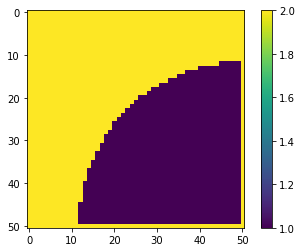

In [124]:
plt.imshow(test_small_area[39,:,:])
plt.colorbar()
test_small_area.shape

In [125]:
test_result_0 = post_processing.IO_curvature(test_full_area)
test_result_0

{2: array([ 1.8108000e+04,  1.7160000e+04,  3.0078000e+04, -2.4754221e-02])}

In [126]:
all_neighbors, num_faces = post_processing.IO_curvature_segment_numface(test_small_area)


# get the boundary location
matrix_shape = test_small_area.shape
nx, ny, nz = matrix_shape
idx = np.indices((nx, ny, nz)).reshape(3, -1).T




In [127]:

location_smaller = []
location_larger = []
for i in range(len(all_neighbors)):
    if len(np.unique(all_neighbors[i])) != 2: continue # remove TJs
    if np.sum(abs(idx[i] - edge_n) < 3): continue     # remove edge points
    
    if test_small_area[tuple(idx[i])] == 1: location_smaller.append(idx[i])
    elif test_small_area[tuple(idx[i])] == 2: location_larger.append(idx[i])

In [138]:

curvature_one_dict = post_processing.IO_curvature_segment_curvature(num_faces, location_smaller, location_larger, matrix_shape)

curvature_one_dict

array([ 2.06700000e+03,  1.96800000e+03,  3.17700000e+03, -2.44741637e-02])